<a href="https://colab.research.google.com/github/nitrogenlab/gp15wmascripts/blob/main/notebooks/comparingWeightings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook compares results of our chosen weights to the relative weights of Peters et al. Peters weights of 140 for temperature, 100 for salinity, 30 for silicate, 20 for oxygen, 20 for nitrate, and 10 for phosphate (Peters et al. used 20 for NO and 10 for PO) were be used in both the thermocline and intermediate and deep waters.


In [2]:
#import our results
!wget https://stacks.stanford.edu/file/druid:tv301yr5579/FinalResults_220109_OCIM_OMP_penaltiesUnchanged.csv -O FinalResults_220109_OCIM_OMP_penaltiesUnchanged.csv

--2022-02-04 18:12:17--  https://stacks.stanford.edu/file/druid:tv301yr5579/FinalResults_220109_OCIM_OMP_penaltiesUnchanged.csv
Resolving stacks.stanford.edu (stacks.stanford.edu)... 171.67.37.91
Connecting to stacks.stanford.edu (stacks.stanford.edu)|171.67.37.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 350410 (342K) [text/csv]
Saving to: ‘FinalResults_220109_OCIM_OMP_penaltiesUnchanged.csv’

FinalResults_220109 100%[===================>] 342.20K  --.-KB/s    in 0.1s    

2022-02-04 18:12:18 (2.23 MB/s) - ‘FinalResults_220109_OCIM_OMP_penaltiesUnchanged.csv’ saved [350410/350410]



In [3]:
#import Peters results
!wget raw.githubusercontent.com/nitrogenlab/GP15_watermassanalysis/main/peters_paper_weightings_220202.csv -O peters_paper_weightings_220202.csv

--2022-02-04 18:12:18--  http://raw.githubusercontent.com/nitrogenlab/GP15_watermassanalysis/main/peters_paper_weightings_220202.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/nitrogenlab/GP15_watermassanalysis/main/peters_paper_weightings_220202.csv [following]
--2022-02-04 18:12:18--  https://raw.githubusercontent.com/nitrogenlab/GP15_watermassanalysis/main/peters_paper_weightings_220202.csv
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 735475 (718K) [text/plain]
Saving to: ‘peters_paper_weightings_220202.csv’

peters_paper_weight 100%[===================>] 718.24K  --.-KB/s    in 0.04s   

2

In [4]:
#load results
import pandas
used_weight = pandas.read_csv("FinalResults_220109_OCIM_OMP_penaltiesUnchanged.csv")
used_weight.columns

Index(['lat', 'lon', 'Depth', 'CTD pressure', 'stnnbr', 'geotrc_ID', 'sigma0',
       'tc', 'conservative_temp', 'absolute_salinity', 'silicate', 'nitrate',
       'phosphate', 'oxygen', 'conservative_temp_resid',
       'absolute_salinity_resid', 'silicate_resid', 'nitrate_resid',
       'phosphate_resid', 'oxygen_resid', 'AABW_frac_total', 'AAIW_frac_total',
       'ENPCW_frac_total', 'ESSW_frac_total', 'EqIW_frac_total',
       'LCDW_frac_total', 'NPIW_frac_total', 'PDW_frac_total',
       'PSUW_frac_total', 'SPCW_frac_total', 'SPSTSW_frac_total',
       'UCDW_frac_total', 'AABW_0_frac', 'AAIW_0_frac', 'AAIW_1_frac',
       'ENPCW_frac', 'ENPCW_0_frac', 'ENPCW_1_frac', 'ESSW_frac',
       'ESSW_0_frac', 'ESSW_1_frac', 'EqIW_0_frac', 'EqIW_1_frac',
       'LCDW_0_frac', 'LCDW_1_frac', 'NPIW_0_frac', 'NPIW_1_frac',
       'NPIW_2_frac', 'PDW_0_frac', 'PDW_1_frac', 'PDW_2_frac', 'PSUW_frac',
       'PSUW_0_frac', 'PSUW_1_frac', 'SPCW_frac', 'SPCW_0_frac', 'SPCW_1_frac',
       'SPSTSW_

In [26]:
#load results
import pandas
import numpy as np
peters_weight = pandas.read_csv("peters_paper_weightings_220202.csv")
peters_weight.columns

Index(['lat', 'lon', 'Depth', 'CTD pressure', 'CTD temperature',
       'practical_salinity', 'stnnbr', 'geotrc_ID', 'sigma0', 'tc',
       'conservative_temp', 'absolute_salinity', 'silicate', 'nitrate',
       'phosphate', 'oxygen', 'conservative_temp_resid',
       'absolute_salinity_resid', 'silicate_resid', 'nitrate_resid',
       'phosphate_resid', 'oxygen_resid', 'AABW_frac_total', 'AAIW_frac_total',
       'ENPCW_frac_total', 'ESSW_frac_total', 'EqIW_frac_total',
       'LCDW_frac_total', 'NPIW_frac_total', 'PDW_frac_total',
       'PSUW_frac_total', 'SPCW_frac_total', 'SPSTSW_frac_total',
       'UCDW_frac_total', 'AABW_0_frac', 'AAIW_0_frac', 'AAIW_1_frac',
       'ENPCW_frac', 'ENPCW_0_frac', 'ENPCW_1_frac', 'ESSW_frac',
       'ESSW_0_frac', 'ESSW_1_frac', 'EqIW_0_frac', 'EqIW_1_frac',
       'LCDW_0_frac', 'LCDW_1_frac', 'NPIW_0_frac', 'NPIW_1_frac',
       'NPIW_2_frac', 'PDW_0_frac', 'PDW_1_frac', 'PDW_2_frac', 'PSUW_frac',
       'PSUW_0_frac', 'PSUW_1_frac', 'SPCW_frac

In [27]:
#Thermocline only:
tc_used_weight=used_weight[used_weight['tc']==1]
tc_peters_weight=peters_weight[peters_weight['tc']==1]
#reset index so can use for loop easily
tc_used_weight=tc_used_weight.reset_index()
tc_peters_weight=tc_peters_weight.reset_index()

#Intermediate and deep only:
deep_used_weight=used_weight[used_weight['tc']==0]
deep_peters_weight=peters_weight[peters_weight['tc']==0]
#reset index so can use for loop easily
deep_used_weight=deep_used_weight.reset_index()
deep_peters_weight=deep_peters_weight.reset_index()

In [28]:
resid_frac = ['conservative_temp_resid',
       'absolute_salinity_resid', 'silicate_resid', 'nitrate_resid',
       'phosphate_resid', 'oxygen_resid', 'AABW_frac_total', 'AAIW_frac_total',
       'ENPCW_frac_total', 'ESSW_frac_total', 'EqIW_frac_total',
       'LCDW_frac_total', 'NPIW_frac_total', 'PDW_frac_total',
       'PSUW_frac_total', 'SPCW_frac_total', 'SPSTSW_frac_total',
       'UCDW_frac_total']
# create an empty dataframe
# with columns
tc_diff_df  = pandas.DataFrame() #create df to store diff in thermocline samples
deep_diff_df  = pandas.DataFrame() #create df store diff in deep and int samples
#columns = resid_frac

In [29]:
#loop to calculate diff in thermocline samples
from numpy.core.numeric import NaN
for name in resid_frac:
  tc_diff_df[name] = tc_used_weight[name] - tc_peters_weight[name]
  for diff in  range(len(tc_diff_df[name])):
    if tc_used_weight[name][diff] == 0 and tc_peters_weight[name][diff] == 0:
      tc_diff_df[name][diff] =  NaN #remove samples that had zero water mass fraction for both weights
  else:
    pass

In [30]:
#loop to calculate diff in int and deep samples
from numpy.core.numeric import NaN
for name in resid_frac:
  deep_diff_df[name] = deep_used_weight[name] - deep_peters_weight[name]
  for diff in  range(len(deep_diff_df[name])):
    if deep_used_weight[name][diff] == 0 and deep_peters_weight[name][diff] == 0:
      deep_diff_df[name][diff] =  NaN #remove samples that had zero water mass fraction for both weights
    else:
      pass

(-1.0, 1.0)

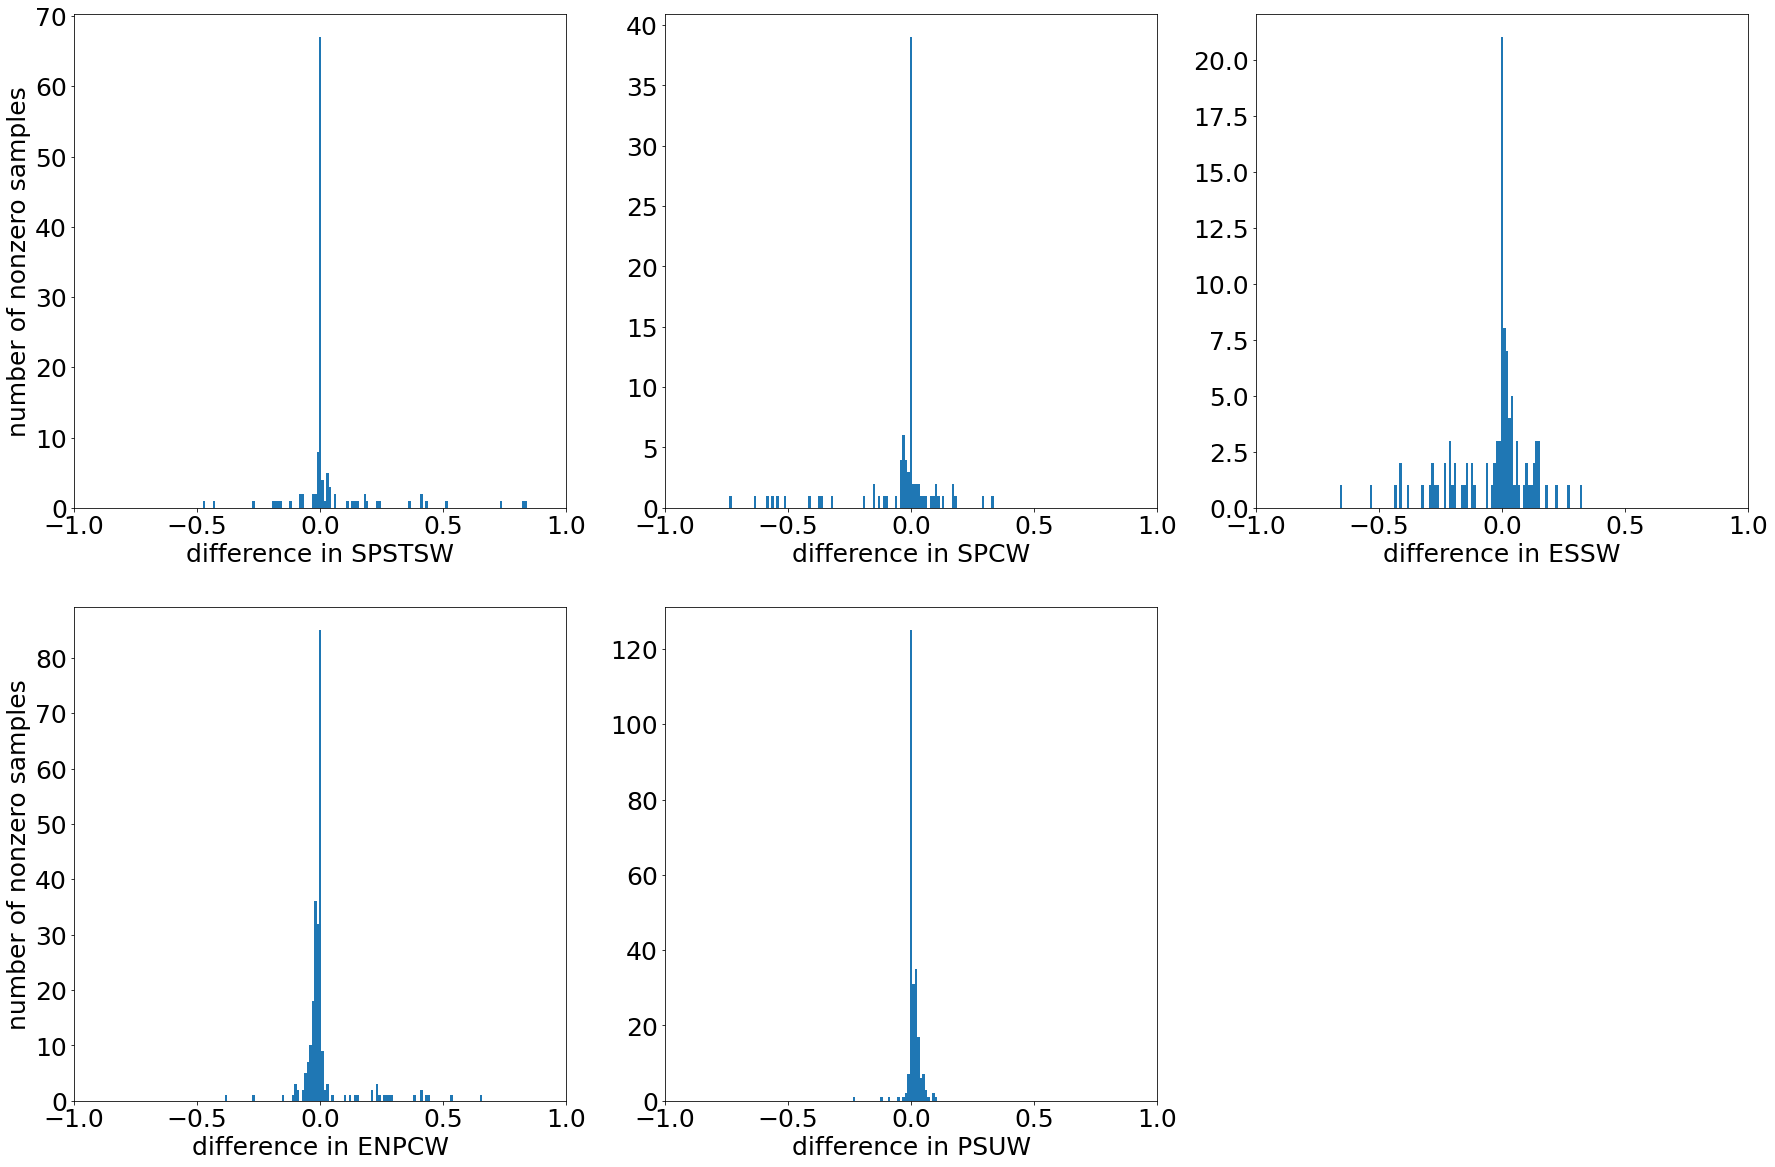

In [61]:
#plot difference in thermocline water mass fractions
import matplotlib.pyplot
fig1 = matplotlib.pyplot.figure(figsize=(30.0, 20.0))

ax1 = fig1.add_subplot(2, 3, 1)
ax2 = fig1.add_subplot(2, 3, 2)
ax3 = fig1.add_subplot(2, 3, 3)
ax4 = fig1.add_subplot(2, 3, 4)
ax6 = fig1.add_subplot(2, 3, 5)


#SPSTSW
ax1.set_ylabel('number of nonzero samples', fontsize=25)
ax1.set_xlabel('difference in SPSTSW', fontsize=25)
ax1.hist(tc_diff_df["SPSTSW_frac_total"], bins=np.linspace(-1,1,200))
ax1.tick_params(axis='y',labelsize=25)
ax1.tick_params(axis='x',labelsize=25)
ax1.set_xlim(-1, 1)
#ax1.set_ylim(0,1000)

#SPCW
#ax2.set_ylabel('number of samples', fontsize=25)
ax2.set_xlabel('difference in SPCW', fontsize=25)
ax2.hist(tc_diff_df["SPCW_frac_total"], bins=np.linspace(-1,1,200))
ax2.tick_params(axis='y',labelsize=25)
ax2.tick_params(axis='x',labelsize=25)
ax2.set_xlim(-1, 1)
#ax2.set_ylim(0,1000)

#ESSW
#ax3.set_ylabel('number of samples', fontsize=25)
ax3.set_xlabel('difference in ESSW', fontsize=25)
ax3.hist(tc_diff_df["ESSW_frac_total"], bins=np.linspace(-1,1,200))
ax3.tick_params(axis='y',labelsize=25)
ax3.tick_params(axis='x',labelsize=25)
ax3.set_xlim(-1, 1)
#ax3.set_ylim(0,1000)

#ENPCW
ax4.set_ylabel('number of nonzero samples', fontsize=25)
ax4.set_xlabel('difference in ENPCW', fontsize=25)
ax4.hist(tc_diff_df["ENPCW_frac_total"], bins=np.linspace(-1,1,200))
ax4.tick_params(axis='y',labelsize=25)
ax4.tick_params(axis='x',labelsize=25)
ax4.set_xlim(-1, 1)
#ax4.set_ylim(0,1000)


#PSUW
#ax6.set_ylabel('number of samples', fontsize=25)
ax6.set_xlabel('difference in PSUW', fontsize=25)
ax6.hist(tc_diff_df["PSUW_frac_total"], bins=np.linspace(-1,1,200))
ax6.tick_params(axis='y',labelsize=25)
ax6.tick_params(axis='x',labelsize=25)
ax6.set_xlim(-1, 1)
#ax6.set_ylim(0,1000)

(-1.0, 1.0)

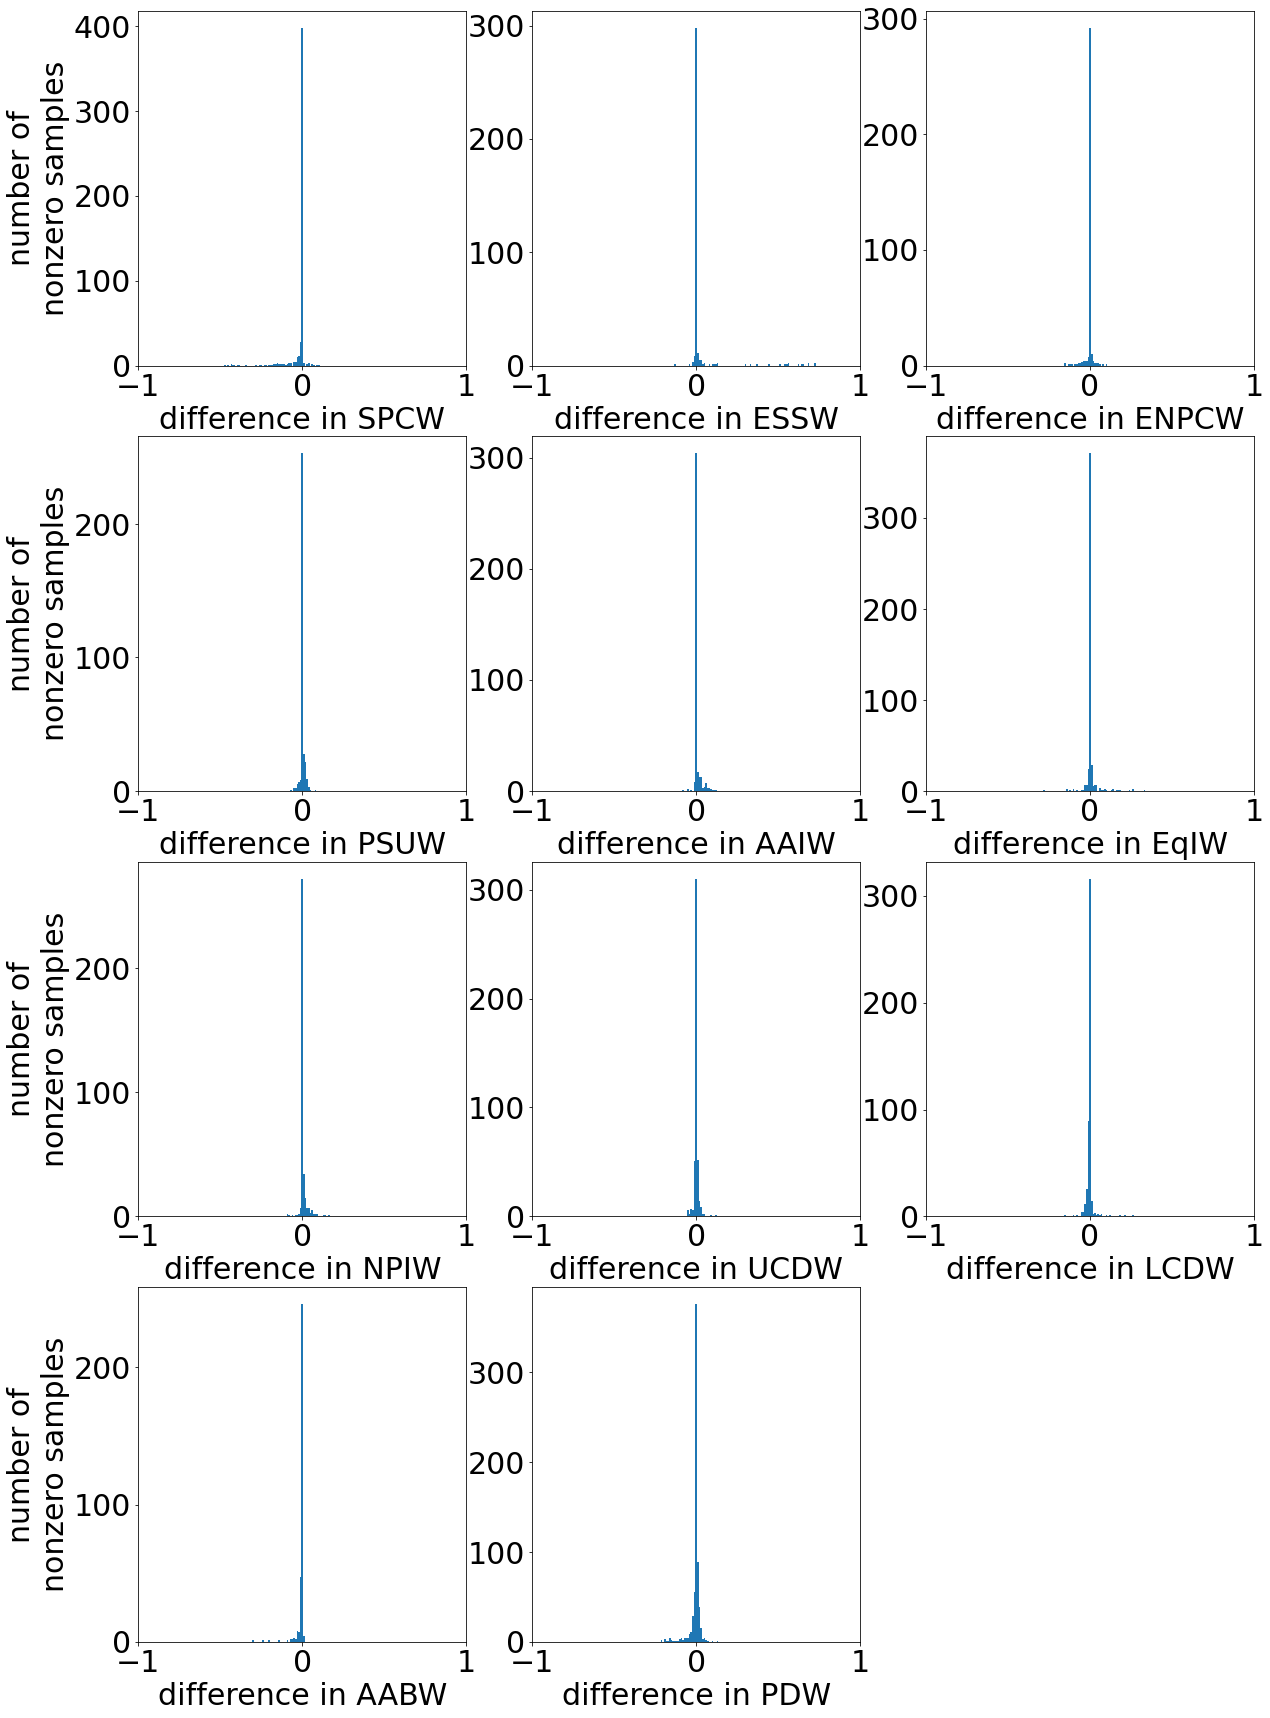

In [62]:
fig2 = matplotlib.pyplot.figure(figsize=(20.0, 30.0))

ax1 = fig2.add_subplot(4, 3, 1)
ax2 = fig2.add_subplot(4, 3, 2)
ax3 = fig2.add_subplot(4, 3, 3)
ax4 = fig2.add_subplot(4, 3, 4)
ax5 = fig2.add_subplot(4, 3, 5)
ax6 = fig2.add_subplot(4, 3, 6)
ax7 = fig2.add_subplot(4, 3, 7)
ax8 = fig2.add_subplot(4, 3, 8)
ax9 = fig2.add_subplot(4, 3, 9)
ax10 = fig2.add_subplot(4, 3, 10)
ax11 = fig2.add_subplot(4, 3, 11)

#SPCW
ax1.set_ylabel(r'number of'"\n" r'nonzero samples', fontsize=30)
ax1.set_xlabel('difference in SPCW', fontsize=30)
ax1.hist(deep_diff_df["SPCW_frac_total"], bins=np.linspace(-1,1,200))
ax1.tick_params(axis='y',labelsize=30)
ax1.tick_params(axis='x',labelsize=30)
ax1.set_xlim(-1, 1)
#ax1.set_ylim(0,1000)

#ESSW
#ax2.set_ylabel('number of samples', fontsize=30)
ax2.set_xlabel('difference in ESSW', fontsize=30)
ax2.hist(deep_diff_df["ESSW_frac_total"], bins=np.linspace(-1,1,200))
ax2.tick_params(axis='y',labelsize=30)
ax2.tick_params(axis='x',labelsize=30)
ax2.set_xlim(-1, 1)
#ax2.set_ylim(0,1000)

#ENPCW
#ax3.set_ylabel('number of nonzero samples', fontsize=30)
ax3.set_xlabel('difference in ENPCW', fontsize=30)
ax3.hist(deep_diff_df["ENPCW_frac_total"], bins=np.linspace(-1,1,200))
ax3.tick_params(axis='y',labelsize=30)
ax3.tick_params(axis='x',labelsize=30)
ax3.set_xlim(-1, 1)
#ax3.set_ylim(0,1000)


#PSUW
ax4.set_ylabel(r'number of'"\n" r'nonzero samples', fontsize=30)
ax4.set_xlabel('difference in PSUW', fontsize=30)
ax4.hist(deep_diff_df["PSUW_frac_total"], bins=np.linspace(-1,1,200))
ax4.tick_params(axis='y',labelsize=30)
ax4.tick_params(axis='x',labelsize=30)
ax4.set_xlim(-1, 1)
#ax4.set_ylim(0,1000)

#AAIW
#ax5.set_ylabel('number of nonzero samples', fontsize=30)
ax5.set_xlabel('difference in AAIW', fontsize=30)
ax5.hist(deep_diff_df["AAIW_frac_total"], bins=np.linspace(-1,1,200))
ax5.tick_params(axis='y',labelsize=30)
ax5.tick_params(axis='x',labelsize=30)
ax5.set_xlim(-1, 1)
#ax5.set_ylim(0,1000)

#EqIW
#ax6.set_ylabel('number of samples', fontsize=30)
ax6.set_xlabel('difference in EqIW', fontsize=30)
ax6.hist(deep_diff_df["EqIW_frac_total"], bins=np.linspace(-1,1,200))
ax6.tick_params(axis='y',labelsize=30)
ax6.tick_params(axis='x',labelsize=30)
ax6.set_xlim(-1, 1)
#ax6.set_ylim(0,1000)

#NPIW
ax7.set_ylabel(r'number of'"\n" r'nonzero samples', fontsize=30)
ax7.set_xlabel('difference in NPIW', fontsize=30)
ax7.hist(deep_diff_df["NPIW_frac_total"], bins=np.linspace(-1,1,200))
ax7.tick_params(axis='y',labelsize=30)
ax7.tick_params(axis='x',labelsize=30)
ax7.set_xlim(-1, 1)
#ax7.set_ylim(0,1000)

#UCDW
#ax8.set_ylabel('number of nonzero samples', fontsize=30)
ax8.set_xlabel('difference in UCDW', fontsize=30)
ax8.hist(deep_diff_df["UCDW_frac_total"], bins=np.linspace(-1,1,200))
ax8.tick_params(axis='y',labelsize=30)
ax8.tick_params(axis='x',labelsize=30)
ax8.set_xlim(-1, 1)
#ax8.set_ylim(0,1000)

#LCDW
#ax9.set_ylabel('number of samples', fontsize=25)
ax9.set_xlabel('difference in LCDW', fontsize=30)
ax9.hist(deep_diff_df["LCDW_frac_total"], bins=np.linspace(-1,1,200))
ax9.tick_params(axis='y',labelsize=30)
ax9.tick_params(axis='x',labelsize=30)
ax9.set_xlim(-1, 1)
#ax9.set_ylim(0,1000)

#AABW
ax10.set_ylabel(r'number of'"\n" r'nonzero samples', fontsize=30)
ax10.set_xlabel('difference in AABW', fontsize=30)
ax10.hist(deep_diff_df["AABW_frac_total"], bins=np.linspace(-1,1,200))
ax10.tick_params(axis='y',labelsize=30)
ax10.tick_params(axis='x',labelsize=30)
ax10.set_xlim(-1, 1)
#ax10.set_ylim(0,1000)

#PDW
#ax11.set_ylabel('number of nonzero samples', fontsize=30)
ax11.set_xlabel('difference in PDW', fontsize=30)
ax11.hist(deep_diff_df["PDW_frac_total"], bins=np.linspace(-1,1,200))
ax11.tick_params(axis='y',labelsize=30)
ax11.tick_params(axis='x',labelsize=30)
ax11.set_xlim(-1, 1)
#ax11.set_ylim(0,1000)

In [58]:
np.linspace(-1,1,200)

array([-1.        , -0.98994975, -0.9798995 , -0.96984925, -0.95979899,
       -0.94974874, -0.93969849, -0.92964824, -0.91959799, -0.90954774,
       -0.89949749, -0.88944724, -0.87939698, -0.86934673, -0.85929648,
       -0.84924623, -0.83919598, -0.82914573, -0.81909548, -0.80904523,
       -0.79899497, -0.78894472, -0.77889447, -0.76884422, -0.75879397,
       -0.74874372, -0.73869347, -0.72864322, -0.71859296, -0.70854271,
       -0.69849246, -0.68844221, -0.67839196, -0.66834171, -0.65829146,
       -0.64824121, -0.63819095, -0.6281407 , -0.61809045, -0.6080402 ,
       -0.59798995, -0.5879397 , -0.57788945, -0.5678392 , -0.55778894,
       -0.54773869, -0.53768844, -0.52763819, -0.51758794, -0.50753769,
       -0.49748744, -0.48743719, -0.47738693, -0.46733668, -0.45728643,
       -0.44723618, -0.43718593, -0.42713568, -0.41708543, -0.40703518,
       -0.39698492, -0.38693467, -0.37688442, -0.36683417, -0.35678392,
       -0.34673367, -0.33668342, -0.32663317, -0.31658291, -0.30

In [49]:
this = 2.1/80

In [50]:
-1+(this*2)

-0.9475

difference in residuals

In [ ]:
#plot difference in residuals thermocline
import matplotlib.pyplot
fig1 = matplotlib.pyplot.figure(figsize=(30.0, 20.0))

ax1 = fig1.add_subplot(2, 3, 1)
ax2 = fig1.add_subplot(2, 3, 2)
ax3 = fig1.add_subplot(2, 3, 3)
ax4 = fig1.add_subplot(2, 3, 4)
ax5 = fig1.add_subplot(2, 3, 5)
ax6 = fig1.add_subplot(2, 3, 6)


#conservative temp plot
ax1.set_ylabel('number of GP15 samples', fontsize=25)
ax1.set_xlabel('difference in temperature residual', fontsize=25)
ax1.hist(tc_diff_df["conservative_temp_resid"], bins=50)
ax1.tick_params(axis='y',labelsize=25)
ax1.tick_params(axis='x',labelsize=25)
ax1.set_xlim(-1, 1)
#ax1.set_ylim(0,1000)

#sal plot
ax2.set_ylabel('number of GP15 samples', fontsize=25)
ax2.set_xlabel('difference in salinity residual', fontsize=25)
ax2.hist(tc_diff_df["absolute_salinity_resid"], bins=50)
ax2.tick_params(axis='y',labelsize=25)
ax2.tick_params(axis='x',labelsize=25)
ax2.set_xlim(-0.25, 0.25)
#ax2.set_ylim(0,1000)

#oxy plot
ax3.set_ylabel('number of GP15 samples', fontsize=25)
ax3.set_xlabel('difference in oxygen residual', fontsize=25)
ax3.hist(tc_diff_df["oxygen_resid"], bins=50)
ax3.tick_params(axis='y',labelsize=25)
ax3.tick_params(axis='x',labelsize=25)
ax3.set_xlim(-25, 25)
#ax3.set_ylim(0,1000)

#si plot
ax4.set_ylabel('number of GP15 samples', fontsize=25)
ax4.set_xlabel('difference in silicate residual', fontsize=25)
ax4.hist(tc_diff_df["silicate_resid"], bins=50)
ax4.tick_params(axis='y',labelsize=25)
ax4.tick_params(axis='x',labelsize=25)
ax4.set_xlim(-7, 7)
#ax4.set_ylim(0,1000)

#nitrate plot
ax5.set_ylabel('number of GP15 samples', fontsize=25)
ax5.set_xlabel('difference in nitrate residual', fontsize=25)
ax5.hist(tc_diff_df["nitrate_resid"], bins=50)
ax5.tick_params(axis='y',labelsize=25)
ax5.tick_params(axis='x',labelsize=25)
ax5.set_xlim(-3, 3)
#ax5.set_ylim(0,1000)

#phosphate plot
ax6.set_ylabel('number of GP15 samples', fontsize=25)
ax6.set_xlabel('difference in phosphate residual', fontsize=25)
ax6.hist(tc_diff_df["phosphate_resid"], bins=50)
ax6.tick_params(axis='y',labelsize=25)
ax6.tick_params(axis='x',labelsize=25)
ax6.set_xlim(-0.15, 0.15)
#ax6.set_ylim(0,1000)